# Applied Modern Portfolio Theory

In this project I want to show how to optimize a portfolio of ETFs, based 
on my own experience as an ETF's investor, according to the Markowitz mean-variance criterion. The objective of this program is to built the efficient frontier of the opportunity set and then maximize the sharpe ratio with respect to the single weights of the ETFs in the portfolio, in order to find the best allocation for my risk appetite i.e. the allocation that maximize the return and minimize the standard deviation as a measure of the risk of the securities.

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

Create a list of ETFs tickers in my portfolio

In [2]:
etf = ['HMCD.L','SWDA.MI','IESE.MI','UPVLD.MI','ECRP.MI','JBEM.MI','MTI.PA','SGLD.MI','COMF.L','EPRE.MI']

Assign a weight to each ETF (remember that they must sum to 1)

Equally weighted portfolio

In [3]:
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
weights.size

10

In [5]:
weights.sum()

1.0

Decide the start date of the backtesting

In [6]:
start_date = dt.datetime(2018, 1, 1)
start_date

datetime.datetime(2018, 1, 1, 0, 0)

End date:

In [7]:
end_date = dt.datetime(2022,3,3)
end_date

datetime.datetime(2022, 3, 3, 0, 0)

Import our data from yahoo and create a dataframe by using Pandas Datareader

In [8]:
df = pdr.get_data_yahoo(etf, start_date, end_date)
df.head()

Attributes Adj Close                                                 \
Symbols       HMCD.L    SWDA.MI IESE.MI UPVLD.MI    ECRP.MI JBEM.MI   
Date                                                                  
2018-01-02   9.22100  45.139999     NaN   17.584  51.189999     NaN   
2018-01-03   9.35750  45.535000     NaN   17.584  51.169998     NaN   
2018-01-04   9.42875  45.764999     NaN   17.584  51.169998     NaN   
2018-01-05   9.47750  46.084999     NaN   17.584  51.169998     NaN   
2018-01-08   9.53250  46.410000     NaN   17.584  51.169998     NaN   

Attributes                                               ...    Volume  \
Symbols         MTI.PA     SGLD.MI   COMF.L     EPRE.MI  ...    HMCD.L   
Date                                                     ...             
2018-01-02  150.270004  106.300003  14.6320  357.739197  ...   26920.0   
2018-01-03  150.649994  106.800003  14.6475  360.354309  ...   43849.0   
2018-01-04  150.970001  106.620003  14.6900  359.048004  ...   84070.0   
2018-01-05  150.860001  106.989998  14.5950  362.338104  ...   18427.0   
2018-01-08  151.070007  107.309998  14.5675  365.306488  ...  108907.0   

Attributes                                                             \
Symbols      SWDA.MI IESE.MI UPVLD.MI ECRP.MI JBEM.MI  MTI.PA SGLD.MI   
Date                                                                    
2018-01-02  184080.0     NaN      0.0     0.0     NaN  3742.0   785.0   
2018-01-03   70419.0     NaN      0.0  2014.0     NaN  2020.0   148.0   
2018-01-04  108532.0     NaN      0.0     0.0     NaN  1208.0  5061.0   
2018-01-05   22047.0     NaN      0.0     0.0     NaN  2570.0   357.0   
2018-01-08   38439.0     NaN      0.0     0.0     NaN  3168.0  3282.0   

Attributes                   
Symbols      COMF.L EPRE.MI  
Date                         
2018-01-02    859.0     0.0  
2018-01-03  16413.0     0.0  
2018-01-04  33608.0     0.0  
2018-01-05  11698.0     0.0  
2018-01-08  19514.0     0.0  

[5 rows x 60 columns]

## Data visualization

We're only interested in the Adjusted Close price 

In [9]:
df = df['Adj Close']
df

Symbols,HMCD.L,SWDA.MI,IESE.MI,UPVLD.MI,ECRP.MI,JBEM.MI,MTI.PA,SGLD.MI,COMF.L,EPRE.MI
Date,,,,,,,,,,
2018-01-02,9.22100,45.139999,NaN,17.584,51.189999,NaN,150.270004,106.300003,14.632000,357.739197
2018-01-03,9.35750,45.535000,NaN,17.584,51.169998,NaN,150.649994,106.800003,14.647500,360.354309
2018-01-04,9.42875,45.764999,NaN,17.584,51.169998,NaN,150.970001,106.620003,14.690000,359.048004
2018-01-05,9.47750,46.084999,NaN,17.584,51.169998,NaN,150.860001,106.989998,14.595000,362.338104
2018-01-08,9.53250,46.410000,NaN,17.584,51.169998,NaN,151.070007,107.309998,14.567500,365.306488
...,...,...,...,...,...,...,...,...,...,...
2022-02-25,7.84500,73.199997,58.41,27.205,51.910000,10.294,170.350006,162.100006,21.832500,413.250000
2022-02-28,7.89500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.139999,415.600006
2022-03-01,7.88375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.870001,407.850006


In [10]:
df.shape

(1073, 10)

In [11]:
df.size

10730

In [12]:
df.describe()

Symbols,HMCD.L,SWDA.MI,IESE.MI,UPVLD.MI,ECRP.MI,JBEM.MI,MTI.PA,SGLD.MI,COMF.L,EPRE.MI
count,1056.000000,1055.000000,692.000000,1055.000000,1055.000000,677.000000,1066.000000,1055.000000,1056.000000,1059.000000
mean,8.962328,56.105654,51.582623,20.429883,52.828280,10.771415,157.876257,131.896389,14.967073,375.779096
std,1.279017,10.087544,7.286343,3.343086,1.575157,0.168731,7.768696,20.257374,2.345639,36.504700
min,6.866250,40.235001,34.869999,15.232000,46.535000,10.240000,142.660004,98.660004,10.890000,263.850006
25%,7.955000,48.215000,45.998749,18.108000,51.090000,10.644000,150.550003,109.834999,13.602500,350.900009
50%,8.665000,53.180000,49.615000,19.104000,53.470001,10.780000,158.354996,137.470001,14.163750,368.250000
75%,9.698750,62.760000,58.757500,21.940001,54.235001,10.878000,163.305004,149.169998,15.665625,404.875000
max,13.060000,79.529999,65.360001,28.695000,55.160000,11.118000,174.630005,167.869995,23.555000,455.950012


Plot the historical adjusted closing price of the ETFs

<AxesSubplot:xlabel='Date'>

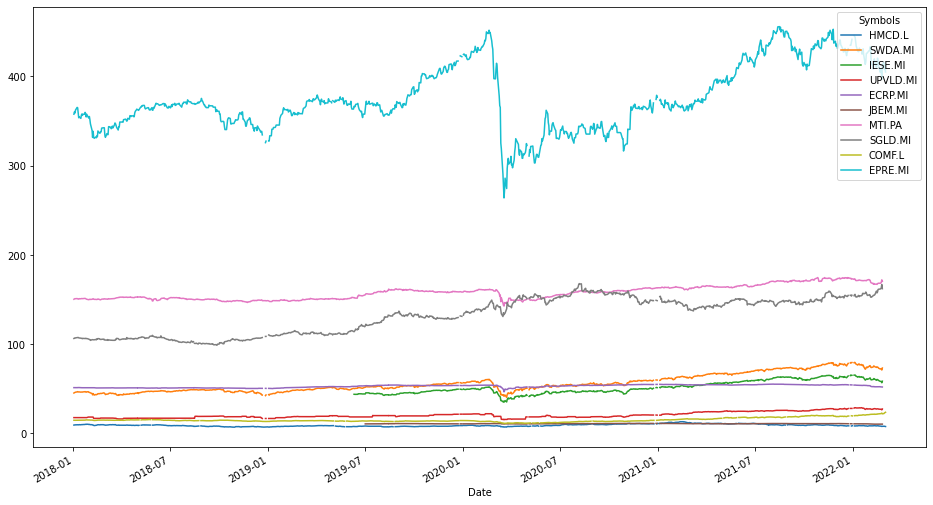

In [13]:
df.plot(figsize=(16,9))

## Data cleaning

We can see that there are some missing value, and we count how many:

In [14]:
pd.isna(df).sum()

Symbols
HMCD.L       17
SWDA.MI      18
IESE.MI     381
UPVLD.MI     18
ECRP.MI      18
JBEM.MI     396
MTI.PA        7
SGLD.MI      18
COMF.L       17
EPRE.MI      14
dtype: int64

We can choose to visualize only the available data and drop the NAN

In [15]:
df.dropna(inplace=True)
df

Symbols,HMCD.L,SWDA.MI,IESE.MI,UPVLD.MI,ECRP.MI,JBEM.MI,MTI.PA,SGLD.MI,COMF.L,EPRE.MI
Date,,,,,,,,,,
2019-07-02,8.16000,51.560001,44.115002,18.334000,53.230000,10.552,155.270004,120.330002,13.582500,363.049988
2019-07-03,8.09875,52.130001,45.369999,18.334000,53.340000,10.552,156.309998,122.220001,13.677500,369.049988
2019-07-04,8.11000,52.230000,45.369999,18.334000,53.410000,10.552,156.339996,121.870003,13.700000,372.299988
2019-07-05,8.01375,52.130001,45.369999,18.334000,53.340000,10.552,156.419998,121.000000,13.712500,368.850006
2019-07-08,7.91750,52.020000,45.369999,18.334000,53.320000,10.552,156.100006,121.080002,13.697500,369.899994
...,...,...,...,...,...,...,...,...,...,...
2022-02-21,8.11750,72.139999,58.259998,26.889999,52.220001,10.288,168.320007,161.729996,21.934999,404.750000
2022-02-22,8.02750,72.330002,58.200001,26.930000,52.009998,10.264,168.279999,162.160004,22.027500,407.700012
2022-02-23,7.96375,71.970001,58.110001,26.930000,51.990002,10.280,169.380005,163.000000,22.205000,406.350006


Check if now there are some NaN values left

In [16]:
pd.isna(df).sum()

Symbols
HMCD.L      0
SWDA.MI     0
IESE.MI     0
UPVLD.MI    0
ECRP.MI     0
JBEM.MI     0
MTI.PA      0
SGLD.MI     0
COMF.L      0
EPRE.MI     0
dtype: int64

<AxesSubplot:xlabel='Date'>

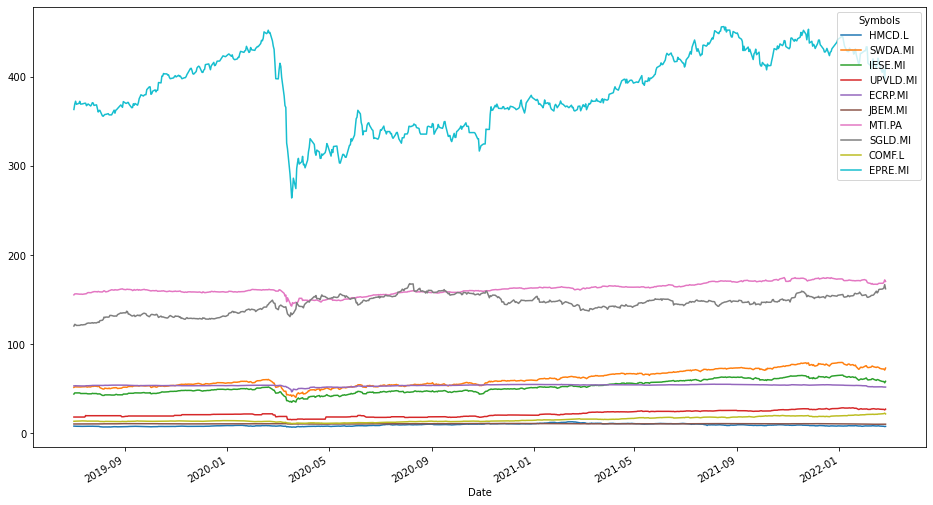

In [17]:
df.plot(figsize=(16,9))

No more missing data!

## Computing portfolio statistics

Compute the daily log return

In [18]:
log_returns = np.log(df/df.shift())
log_returns

Symbols,HMCD.L,SWDA.MI,IESE.MI,UPVLD.MI,ECRP.MI,JBEM.MI,MTI.PA,SGLD.MI,COMF.L,EPRE.MI
Date,,,,,,,,,,
2019-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,-0.007534,0.010994,0.028051,0.000000,0.002064,0.000000,0.006676,0.015585,0.006970,0.016392
2019-07-04,0.001388,0.001916,0.000000,0.000000,0.001311,0.000000,0.000192,-0.002868,0.001644,0.008768
2019-07-05,-0.011939,-0.001916,0.000000,0.000000,-0.001311,0.000000,0.000512,-0.007164,0.000912,-0.009310
2019-07-08,-0.012083,-0.002112,0.000000,0.000000,-0.000375,0.000000,-0.002048,0.000661,-0.001094,0.002843
...,...,...,...,...,...,...,...,...,...,...
2022-02-21,-0.012548,-0.011440,-0.016175,-0.008333,-0.002104,-0.001554,0.000713,0.001299,0.008010,-0.018360
2022-02-22,-0.011149,0.002630,-0.001030,0.001486,-0.004030,-0.002336,-0.000238,0.002655,0.004208,0.007262
2022-02-23,-0.007973,-0.004990,-0.001548,0.000000,-0.000385,0.001558,0.006515,0.005167,0.008026,-0.003317


Compute the variance-covariance matrix annualized (252 business days)

In [19]:
cov_matrix_annual = log_returns.cov()*252
cov_matrix_annual

Symbols,HMCD.L,SWDA.MI,IESE.MI,UPVLD.MI,ECRP.MI,JBEM.MI,MTI.PA,SGLD.MI,COMF.L,EPRE.MI
Symbols,,,,,,,,,,
HMCD.L,0.069971,0.033182,0.029801,0.005777,0.004093,-0.002187,0.002268,0.001769,0.013996,0.024716
SWDA.MI,0.033182,0.039654,0.035067,0.012876,0.004536,-0.001372,0.002798,0.001215,0.013303,0.030279
IESE.MI,0.029801,0.035067,0.039193,0.013111,0.004833,-0.001093,0.003348,0.002486,0.012320,0.032053
UPVLD.MI,0.005777,0.012876,0.013111,0.055585,0.001698,0.001563,-0.001337,0.002296,0.006280,0.012576
ECRP.MI,0.004093,0.004536,0.004833,0.001698,0.004102,0.000784,0.002039,0.001813,0.002622,0.007074
JBEM.MI,-0.002187,-0.001372,-0.001093,0.001563,0.000784,0.002211,0.000663,0.001606,-0.000554,0.000338
MTI.PA,0.002268,0.002798,0.003348,-0.001337,0.002039,0.000663,0.005049,0.001975,0.002132,0.005048
SGLD.MI,0.001769,0.001215,0.002486,0.002296,0.001813,0.001606,0.001975,0.021637,0.006583,0.004211
COMF.L,0.013996,0.013303,0.012320,0.006280,0.002622,-0.000554,0.002132,0.006583,0.020168,0.013035


Variance of the portfolio 

In [20]:
portfolio_var =np.dot(weights.T, np.dot(cov_matrix_annual,weights))
portfolio_var

0.010090125280934593

Portfolio standard deviation: a measure of volatility

In [21]:
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

0.10044961563358315

Compute the annual portfolio return

In [22]:
portfolio_returns = np.sum(log_returns.mean() * weights) *252
portfolio_returns

0.07318769539163808

Simulate all the possible mean-variance portfolio with Monte Carlo simulation

In [23]:
n = 5000
weights = np.zeros((n,10))
exp_returns = np.zeros(n)
exp_std = np.zeros(n)
exp_sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(10)
    weight /= weight.sum()
    weights[i] = weight
    exp_returns[i] = np.sum(log_returns.mean()*weight)*252
    exp_std[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    exp_sharpe_ratios[i] = exp_returns[i] / exp_std[i]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Plot of all the possible portofolios

Text(0, 0.5, 'Expected Return')

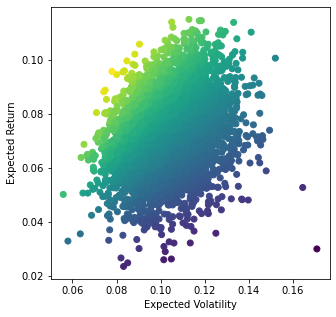

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(exp_std,exp_returns,c=exp_sharpe_ratios)
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

Show the statistics for the equally weighted portfolio:

In [26]:
percent_var = str(round(portfolio_var,3) * 100) + '%'
percent_std = str(round(portfolio_std,3) * 100) + '%'
percent_returns = str(round(portfolio_returns,3) * 100) + '%'

print('Expected annual return: '+ percent_returns)
print('Annual std/risk: '+ percent_std)
print('Annual variance: '+ percent_var)

Expected annual return: 7.3%
Annual std/risk: 10.0%
Annual variance: 1.0%


Import some libraries in order to optimize the portfolio:

In [27]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Compute the expected return and the annualized covariance matrix

In [29]:
from pypfopt import plotting

In [30]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

<AxesSubplot:ylabel='Symbols'>

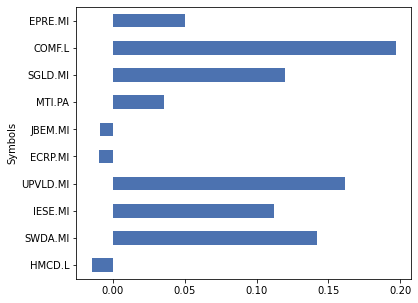

In [31]:
mu.plot.barh(figsize=(6,5))

<AxesSubplot:>

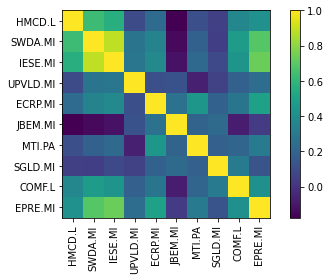

In [32]:
plotting.plot_covariance(S, plot_correlation=True)

## Portfolio optimization by maximizing the Sharpe Ratio

Sharpe ratio formula:
#### 𝑆𝑅 = 𝑅𝑝−𝑅𝑓 / 𝜎𝑝 

𝑅𝑝 : return of portfolio

𝑅𝑓 : risk free return

𝜎𝑝 : standard deviation of portfolio

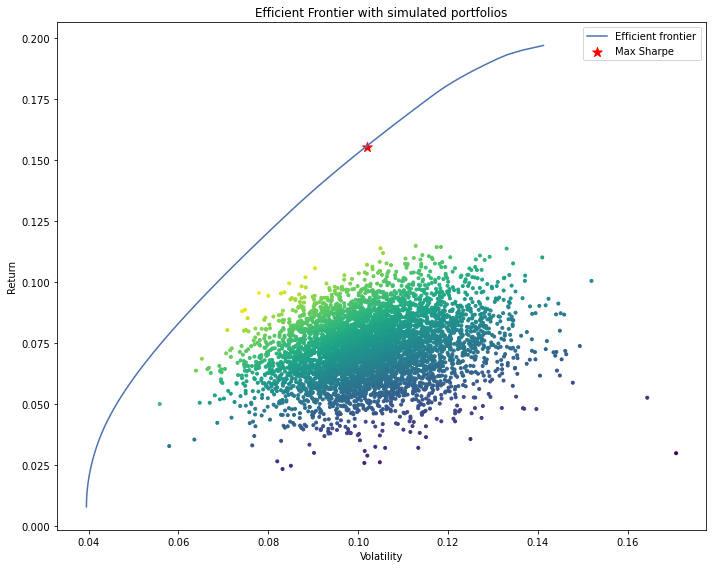

In [33]:
fig, ax = plt.subplots(figsize=(10,8))

#plot the efficient frontier
efficient_front = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(efficient_front, ax=ax, show_assets=False)

#plot all simulated portfolios
ax.scatter(exp_std, exp_returns, marker=".", c=exp_sharpe_ratios)

#compute the efficient frontier
efficient_front = EfficientFrontier(mu, S)

#weight constraint on COMF ETF
comfl_index = efficient_front.tickers.index("COMF.L") 
efficient_front.add_constraint(lambda w: w[comfl_index] <= 0.5)

#compute and plot the optimal portfolio
efficient_front.max_sharpe()
weights = efficient_front.clean_weights()
ret_tangent, std_tangent,_= efficient_front.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label='Max Sharpe')

ax.set_title("Efficient Frontier with simulated portfolios")
ax.legend()
plt.tight_layout()
plt.show()

Compute the optimal weights and the performance of the optimal portfolio

In [34]:
weights
efficient_front.portfolio_performance(verbose=True)

Expected annual return: 15.5%
Annual volatility: 10.2%
Sharpe Ratio: 1.33


(0.15539053253093738, 0.10202738472857933, 1.3270018916108957)

Print the weights of Optimized the Portfolio 

In [35]:
weights

OrderedDict([('HMCD.L', 0.0),
             ('SWDA.MI', 0.0284),
             ('IESE.MI', 0.0),
             ('UPVLD.MI', 0.14583),
             ('ECRP.MI', 0.0),
             ('JBEM.MI', 0.0),
             ('MTI.PA', 0.11494),
             ('SGLD.MI', 0.21082),
             ('COMF.L', 0.5),
             ('EPRE.MI', 0.0)])

C:\Anaconda37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


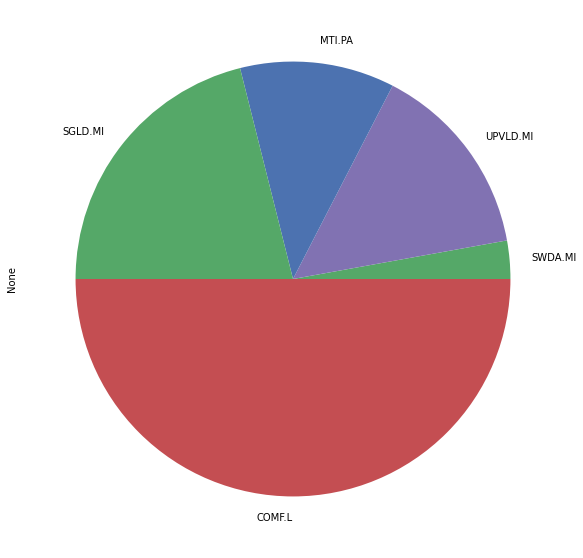

In [36]:
pd.Series(weights).plot.pie(figsize=(10,10));

## Today optimal asset allocation

In [37]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [38]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install cvxopt

Note: you may need to restart the kernel to use updated packages.


Now I will convert continuous weights into a discrete portfolio allocation to show how many shares of each ETF should I own today

In [40]:
latest_prices = get_latest_prices(df)
discrete_all = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, money_left = discrete_all.lp_portfolio()
print('Optimal allocation:'+ str(allocation))
print('Funds left: '+ '€'+ str(round(money_left,3)))

Optimal allocation:{'SWDA.MI': 5, 'UPVLD.MI': 80, 'MTI.PA': 10, 'SGLD.MI': 20, 'COMF.L': 344}
Funds left: €1.72


As you can see this is the optimal portfolio allocation given the current price of the ETFs